# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸

#### 直線

$$f(x) = 1.2x + 0.8$$



In [2]:
#準備 50 個點
x = np.linspace(0, 5, 50)
print(x)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]


In [3]:
y = 1.2*x + 0.8
y

array([0.8       , 0.92244898, 1.04489796, 1.16734694, 1.28979592,
       1.4122449 , 1.53469388, 1.65714286, 1.77959184, 1.90204082,
       2.0244898 , 2.14693878, 2.26938776, 2.39183673, 2.51428571,
       2.63673469, 2.75918367, 2.88163265, 3.00408163, 3.12653061,
       3.24897959, 3.37142857, 3.49387755, 3.61632653, 3.73877551,
       3.86122449, 3.98367347, 4.10612245, 4.22857143, 4.35102041,
       4.47346939, 4.59591837, 4.71836735, 4.84081633, 4.96326531,
       5.08571429, 5.20816327, 5.33061224, 5.45306122, 5.5755102 ,
       5.69795918, 5.82040816, 5.94285714, 6.06530612, 6.1877551 ,
       6.31020408, 6.43265306, 6.55510204, 6.67755102, 6.8       ])

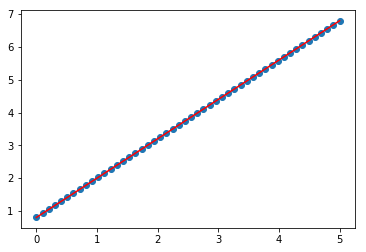

In [4]:
#畫圖
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### add noise 

$$f(x) + \varepsilon(x)$$


In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
print(y)

[ 0.85529535 -0.20750179  1.98110383  1.46611209  1.89930835  0.66992277
  2.48661665  1.42835981  1.14287868  2.16864772  2.16102537  1.48895302
  2.67280144  2.51977906  2.61318225  1.06780488  2.6463725   1.82338293
  2.9524967   2.87333423  4.22965225  2.46441162  3.38091916  4.22669757
  4.89978373  4.38807475  4.23873627  3.72621185  4.08661907  4.05130342
  4.62268089  5.02854348  4.83319296  4.12537617  6.51160079  5.3774786
  6.1407049   5.48913763  5.51967703  4.82584722  5.37609399  6.42538241
  5.96839835  6.36929298  7.03179684  6.30855351  6.00176819  7.8601521
  6.60815411  6.32541646]


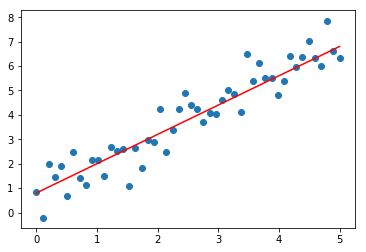

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regr = LinearRegression()

In [9]:
print(x.shape)
X = x.reshape(-1,1)
X.shape

(50,)


(50, 1)


$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$



In [10]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
Y = regr.predict(X)
print(Y)

[0.70776908 0.83655527 0.96534146 1.09412765 1.22291383 1.35170002
 1.48048621 1.6092724  1.73805858 1.86684477 1.99563096 2.12441715
 2.25320334 2.38198952 2.51077571 2.6395619  2.76834809 2.89713427
 3.02592046 3.15470665 3.28349284 3.41227903 3.54106521 3.6698514
 3.79863759 3.92742378 4.05620996 4.18499615 4.31378234 4.44256853
 4.57135472 4.7001409  4.82892709 4.95771328 5.08649947 5.21528565
 5.34407184 5.47285803 5.60164422 5.73043041 5.85921659 5.98800278
 6.11678897 6.24557516 6.37436134 6.50314753 6.63193372 6.76071991
 6.8895061  7.01829228]


In [12]:
#了解你的訓練參數
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

0.40948727720492434


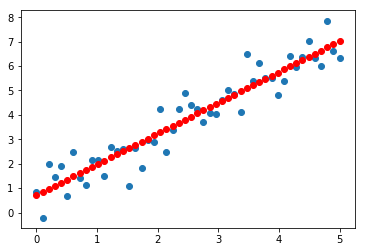

In [13]:
plt.scatter(x, y)
plt.plot(x, Y, 'ro')
#calculate mse
mse = np.sum((Y-y)**2) / len(y)
print(mse)

## 2. 函數訓練and測試

#### 訓練資料、測試資料



In [14]:
from sklearn.model_selection import train_test_split

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train)

[3.36734694 3.57142857 2.65306122 3.46938776 1.83673469 0.71428571
 1.42857143 4.59183673 4.89795918 2.95918367 1.53061224 3.06122449
 3.26530612 1.63265306 4.28571429 2.04081633 4.3877551  0.81632653
 1.32653061 2.55102041 0.51020408 1.73469388 4.08163265 5.
 0.10204082 1.2244898  3.7755102  2.44897959 0.6122449  2.34693878
 3.67346939 2.14285714 1.93877551 0.91836735 3.97959184 4.69387755
 0.30612245 0.         4.79591837 4.48979592]


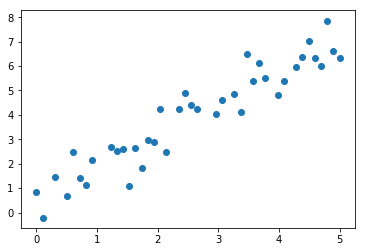

In [16]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [17]:
regr = LinearRegression()
X_train = x_train.reshape(-1,1)
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.29037475]
interception:  0.6083629388134932


In [19]:
Y_train = regr.predict(X_train)

In [20]:
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)

0.4465274588937419


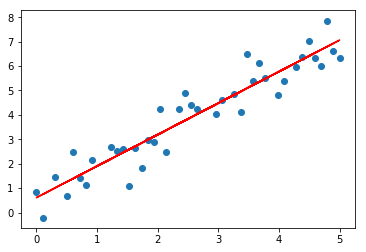

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### test with test data

In [22]:
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)
print(X_test)
print(Y_test)

[[2.85714286]
 [1.12244898]
 [1.02040816]
 [4.18367347]
 [0.20408163]
 [2.75510204]
 [3.87755102]
 [3.16326531]
 [2.24489796]
 [0.40816327]]
[4.29514795 2.05674276 1.92507187 6.00686956 0.87170473 4.16347705
 5.61185688 4.69016063 3.50512259 1.13504651]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [46]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[4.29514795],
       [2.05674276],
       [1.92507187],
       [6.00686956],
       [0.87170473],
       [4.16347705],
       [5.61185688],
       [4.69016063],
       [3.50512259],
       [1.13504651]])

In [23]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

0.2741186503858739


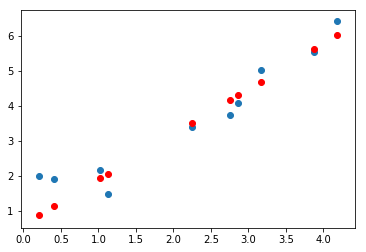

In [24]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, Y_test, c='r')

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [25]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

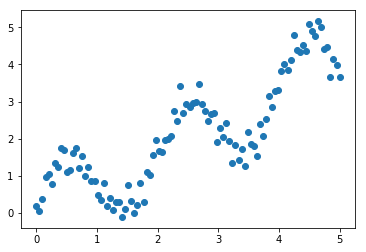

In [26]:
plt.scatter(x,y)

#### nonlinear

In [27]:
regr_lin = LinearRegression()

In [28]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [29]:
regr_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.639314801073646


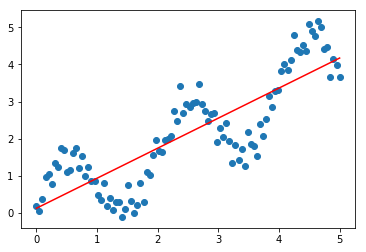

In [30]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , 'r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

In [31]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [32]:
regr_poly = LinearRegression()

In [33]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

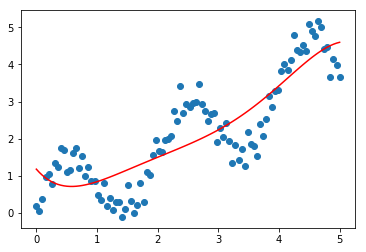

In [34]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [35]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.88820693  2.43301362 -1.09544434  0.23099068 -0.01773054]
interception:  1.179774010108439


$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+w_{5}x_{5}+b$$

In [57]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.17977401, 1.09047643, 1.01276506, 0.94584638, 0.88896158,
       0.84138579, 0.80242743, 0.7714275 , 0.74775885, 0.73082552,
       0.72006204, 0.7149327 , 0.71493087, 0.71957831, 0.72842444,
       0.74104568, 0.75704473, 0.77604986, 0.79771423, 0.8217152 ,
       0.84775357, 0.87555299, 0.90485913, 0.9354391 , 0.96708068,
       0.99959163, 1.032799  , 1.06654845, 1.10070352, 1.13514493,
       1.16976992, 1.2044915 , 1.2392378 , 1.27395131, 1.30858826,
       1.34311784, 1.37752155, 1.41179251, 1.44593471, 1.47996236,
       1.51389917, 1.54777764, 1.58163838, 1.61552941, 1.64950546,
       1.68362725, 1.71796081, 1.75257678, 1.78754973, 1.8229574 ,
       1.85888006, 1.89539981, 1.93259982, 1.97056371, 2.00937479,
       2.04911539, 2.08986618, 2.1317054 , 2.17470825, 2.21894611,
       2.26448591, 2.31138939, 2.3597124 , 2.40950422, 2.46080685,
       2.51365432, 2.56807197, 2.62407576, 2.68167161, 2.74085462,
       2.80160846, 2.86390459, 2.92770162, 2.99294459, 3.05956

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [36]:
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [37]:
sigma = 0.3

In [38]:
X_rbf = np.array([[RBF(k, ..5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



SyntaxError: invalid syntax (<ipython-input-38-3b84634ba9b9>, line 1)

In [ ]:
regr_rbf = LinearRegression()

In [ ]:
regr_rbf.fit(X_rbf, y)

In [ ]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [ ]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

#### Comparison

In [ ]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

In [ ]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [ ]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

In [ ]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

In [ ]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))